
# Future Forecasting of Champagne Sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r'C:\Users\user\Downloads\MKR TASK 5\perrinchampagne.xlsx')
df.head(20)

,Perrin Freres monthly champagne sales millions ’64-’72,Unnamed: 1,Unnamed: 2
0,Exported from datamarket.com,NaN,NaN
1,Date exported,2013-10-01 12:05:00,NaN
2,On DataMarket,http://datamarket.com/data/set/22r5/perrin-fre...,NaN
3,License,Unknown; please assume a restricted license (a...,NaN
4,Provider,Time Series Data Library,NaN
5,Source URL,NaN,NaN
6,Units,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [3]:
df.drop(df.index[:10], inplace=True)
df.drop(columns='Unnamed: 2', inplace=True)

In [4]:
df.columns=df.iloc[0]
df=df[1:]

In [5]:
df.head()

10,Month,Sales
11,1964-01-01 00:00:00,2815
12,1964-02-01 00:00:00,2672
13,1964-03-01 00:00:00,2755
14,1964-04-01 00:00:00,2721
15,1964-05-01 00:00:00,2946


In [6]:
df.shape

(105, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 11 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [8]:
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 11 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.5+ KB


In [9]:
df.set_index('Month',inplace=True)
df.head()

10,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [10]:
df.describe()

10,Sales
count,105
unique,103
top,3986
freq,2


# Visualizing Time Series

<Figure size 1152x504 with 0 Axes>

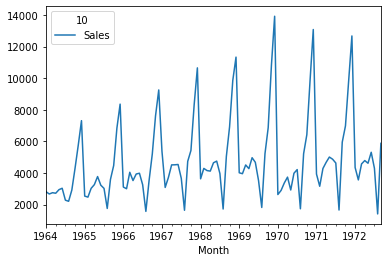

In [11]:
plt.figure(figsize=(16, 7))
df.plot()
plt.show()

### Seasonal Data

# Stationarity Check by Using Augmented Dickey Fuller test (ADH)

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Sales'])

In [14]:
def ADH_Test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p-value','Lags Used','Observations Used']
    for value,label in zip(result,labels):
        print(label+' :- '+str(value) )
    if(result[1]<=0.05):
        print("Data has no unit root and is Stationary")
    else:
        print("Indicating it is Non-Stationary ")  

In [15]:
ADH_Test(df['Sales'])

ADF Test Statistic :- -1.8335930563276228
p-value :- 0.363915771660245
Lags Used :- 11
Observations Used :- 93
Indicating it is Non-Stationary 


## Making Data Stationary

In [16]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [17]:
df['Sales'].shift(1)         #Sales shift with 1 month

Month
1964-01-01     NaN
1964-02-01    2815
1964-03-01    2672
1964-04-01    2755
1964-05-01    2721
              ... 
1972-05-01    4788
1972-06-01    4618
1972-07-01    5312
1972-08-01    4298
1972-09-01    1413
Name: Sales, Length: 105, dtype: object

In [18]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)        #Sales shift with 1 Year(Seasonal)

In [19]:
df.head(10)

10,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143,NaN
1964-03-01,2755,83,NaN
1964-04-01,2721,-34,NaN
1964-05-01,2946,225,NaN
1964-06-01,3036,90,NaN
1964-07-01,2282,-754,NaN
1964-08-01,2212,-70,NaN
1964-09-01,2922,710,NaN


### Again ADH Test

In [20]:
ADH_Test(df['Seasonal First Difference'].dropna())

ADF Test Statistic :- -7.626619157213164
p-value :- 2.060579696813685e-11
Lags Used :- 0
Observations Used :- 92
Data has no unit root and is Stationary


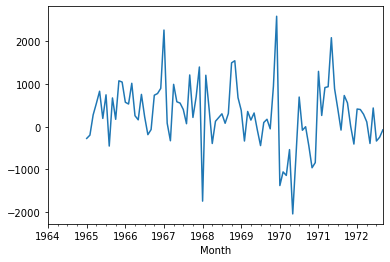

In [21]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

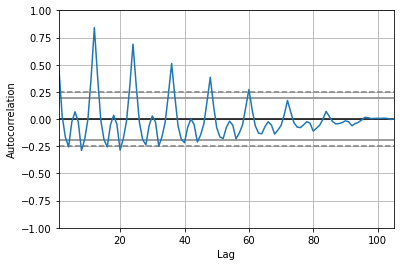

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

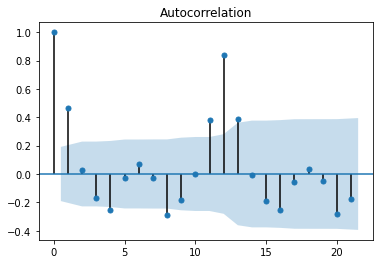

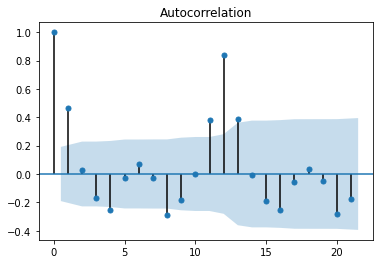

In [24]:
plot_acf(df['Sales'])

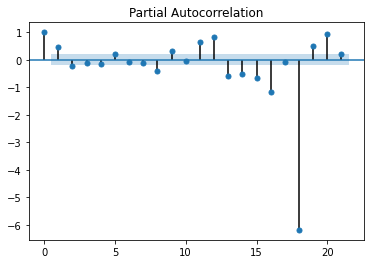

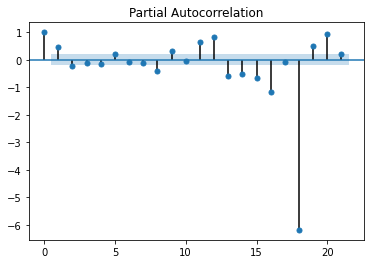

In [25]:
plot_pacf(df['Sales'])

In [26]:
# p=1, d=1, q= 0 or 1

p -> Auto Regressive Model Lags

d -> Differencing

q -> Moving Average Lags

## Using 'SARIMAX' Model 

In [27]:
model=sm.tsa.statespace.SARIMAX(df['Sales'].astype(float),order=(1, 1, 1),seasonal_order=(1,1,1,12))    
results=model.fit()

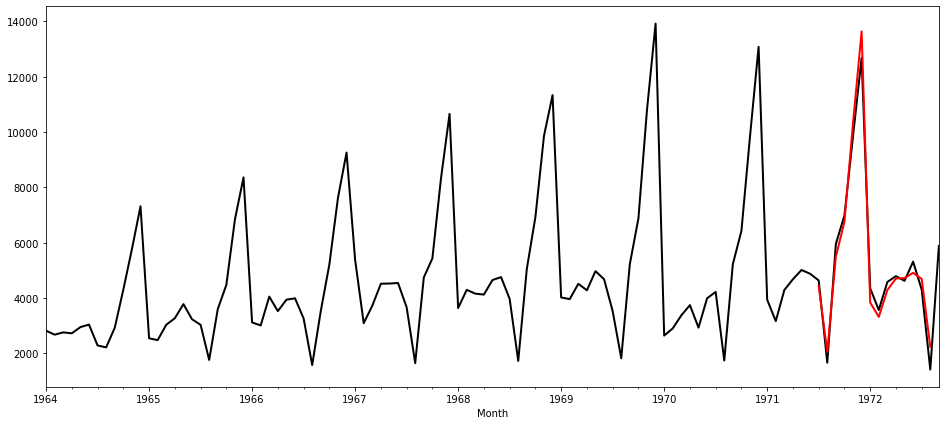

In [28]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df['Sales'].plot(color='0',linewidth=2,figsize=(16,7))
df['forecast'].plot(color='r',linewidth=2,figsize=(16,7))
plt.show()

In [29]:
from pandas.tseries.offsets import DateOffset
New_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]         

In [30]:
New_dates_df=pd.DataFrame(index=New_dates[1:],columns=df.columns)

In [31]:
New_dates_df.tail()

10,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [32]:
New_df=pd.concat([df,New_dates_df])

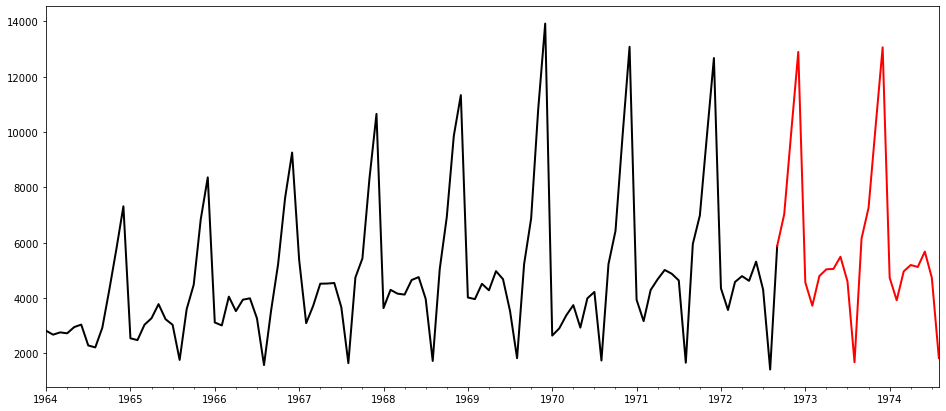

In [33]:
New_df['forecast'] = results.predict(start = 104, end = 128, dynamic= True)        # Next 2 Years Forecasting
New_df['Sales'].plot(color='0',linewidth=2,figsize=(16, 7)) 
New_df['forecast'].plot(color='r',linewidth=2,figsize=(16, 7)) 
plt.show()

## Sales Forecast Result

In [34]:
New_df[105:]

10,Sales,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,7024.268749
1972-11-01,NaN,NaN,NaN,9996.422766
1972-12-01,NaN,NaN,NaN,12892.153968
1973-01-01,NaN,NaN,NaN,4561.509483
1973-02-01,NaN,NaN,NaN,3718.819067
1973-03-01,NaN,NaN,NaN,4792.361044
1973-04-01,NaN,NaN,NaN,5034.609966
1973-05-01,NaN,NaN,NaN,5047.952177
1973-06-01,NaN,NaN,NaN,5488.574103
1973-07-01,NaN,NaN,NaN,4593.626738
